# Search Engine Project: Phases 1, 2, and 3

This notebook implements a search engine for the Cranfield dataset across three phases:
- **Phase 1**: Indexes the dataset using PyTerrier.
- **Phase 2 (Query Preproccessing)**: Processes queries with TF-IDF ranking, fixing identical scores and restrictive retrieval.
- **Phase 3 (Query Expansion)**: Adds query expansion with relevance feedback, synonym mapping, and BERT, a Gradio interface, and evaluation.

## Phase 1: Indexing the Cranfield Dataset

Preprocessing the dataset, comparing stemming methods, and creating a PyTerrier index.

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [2]:
input_file = "cran.all.1400.csv"
output_file = "cran_preprocessed_modern.csv"

In [3]:
print("=== Loading the Cranfield Dataset ===")
data = pd.read_csv(input_file)
df = pd.DataFrame(data)
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of raw data:")
print(df.head())

=== Loading the Cranfield Dataset ===
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Doc_NO          1398 non-null   int64 
 1   Title           1398 non-null   object
 2   Bib             1330 non-null   object
 3   Text            1398 non-null   object
 4   Processed_Text  1398 non-null   object
dtypes: int64(1), object(4)
memory usage: 54.7+ KB
None

First 5 rows of raw data:
   Doc_NO                                              Title  \
0       1  experimental investigation of the aerodynamics...   
1       2  simple shear flow past a flat plate in an inco...   
2       3  the boundary layer in simple shear flow past a...   
3       4  approximate solutions of the incompressible la...   
4       5  one-dimensional transient heat conduction into...   

                                                 Bib  \
0         

In [4]:
print("\n=== Checking for Missing Values ===")
print("Missing values in 'Title':", df['Title'].isna().sum())
print("Missing values in 'Text':", df['Text'].isna().sum())
print("Total rows before dropping NaN:", len(df))


=== Checking for Missing Values ===
Missing values in 'Title': 0
Missing values in 'Text': 0
Total rows before dropping NaN: 1398


In [5]:
df = df.dropna(subset=['Title'])
print("Total rows after dropping NaN in Title:", len(df))
print("\nFirst 5 rows after dropping NaN:")
print(df.head())

Total rows after dropping NaN in Title: 1398

First 5 rows after dropping NaN:
   Doc_NO                                              Title  \
0       1  experimental investigation of the aerodynamics...   
1       2  simple shear flow past a flat plate in an inco...   
2       3  the boundary layer in simple shear flow past a...   
3       4  approximate solutions of the incompressible la...   
4       5  one-dimensional transient heat conduction into...   

                                                 Bib  \
0                         j. ae. scs. 25, 1958, 324.   
1  department of aeronautical engineering, rensse...   
2  department of mathematics, university of manch...   
3                         j. ae. scs. 22, 1955, 728.   
4                         j. ae. scs. 24, 1957, 924.   

                                                Text  \
0  experimental investigation of the aerodynamics...   
1  simple shear flow past a flat plate in an inco...   
2  the boundary layer in simple

In [6]:
print("\n=== Step 1: Cleaning Titles ===")
cleaned_titles = []
for title in df['Title']:
    title_clean = re.sub(r'[^a-zA-Z\s]', '', str(title))
    title_clean = re.sub(r'\s+', ' ', title_clean).strip()
    cleaned_titles.append(title_clean.lower())
df['Cleaned_Title'] = cleaned_titles
print("Sample of cleaned Titles (first 2 rows):")
print(df[['Doc_NO', 'Cleaned_Title']].head(2))


=== Step 1: Cleaning Titles ===
Sample of cleaned Titles (first 2 rows):
   Doc_NO                                      Cleaned_Title
0       1  experimental investigation of the aerodynamics...
1       2  simple shear flow past a flat plate in an inco...


In [7]:
print("\n=== Step 2: Tokenizing Titles and Vocabulary Analysis ===")
vectorizer = CountVectorizer(
    stop_words="english",
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]+\b'
)
vector = vectorizer.fit_transform(df['Cleaned_Title'])
terms = vectorizer.get_feature_names_out()
print("Total unique terms in Titles:", len(terms))
print("First 20 terms in Title vocabulary:", terms[:20])


=== Step 2: Tokenizing Titles and Vocabulary Analysis ===
Total unique terms in Titles: 1804
First 20 terms in Title vocabulary: ['ablating' 'ablation' 'accelerated' 'accelerating' 'according'
 'accumulation' 'accuracy' 'acoustic' 'acoustical' 'acting' 'action'
 'active' 'adapted' 'addendum' 'addition' 'adiabatic' 'adiabaticwall'
 'adjacent' 'advances' 'advancing']


In [8]:
tokenized_titles = []
for title in df['Cleaned_Title']:
    words = title.split()
    tokenized_titles.append(words)
df['Title_Tokens'] = tokenized_titles
print("\nSample tokenized Titles (first 2 rows):")
print(df[['Doc_NO', 'Title_Tokens']].head(2))


Sample tokenized Titles (first 2 rows):
   Doc_NO                                       Title_Tokens
0       1  [experimental, investigation, of, the, aerodyn...
1       2  [simple, shear, flow, past, a, flat, plate, in...


In [9]:
print("\n=== Step 3: Comparing Stemming Methods ===")
porter = PorterStemmer()
snowball = SnowballStemmer("english")
lancaster = LancasterStemmer()


=== Step 3: Comparing Stemming Methods ===


In [10]:
porter_stemmed = []
snowball_stemmed = []
lancaster_stemmed = []
for word in terms:
    porter_stemmed.append(porter.stem(word))
    snowball_stemmed.append(snowball.stem(word))
    lancaster_stemmed.append(lancaster.stem(word))

In [11]:
print("\nStemming Comparison (First 5 Title Terms):")
print("-" * 60)
print(f"{'Original':<15} | {'Porter':<15} | {'Snowball':<15} | {'Lancaster':<15}")
print("-" * 60)
for i in range(min(5, len(terms))):
    print(f"{terms[i]:<15} | {porter_stemmed[i]:<15} | {snowball_stemmed[i]:<15} | {lancaster_stemmed[i]:<15}")
print("-" * 60)


Stemming Comparison (First 5 Title Terms):
------------------------------------------------------------
Original        | Porter          | Snowball        | Lancaster      
------------------------------------------------------------
ablating        | ablat           | ablat           | abl            
ablation        | ablat           | ablat           | abl            
accelerated     | acceler         | acceler         | accel          
accelerating    | acceler         | acceler         | accel          
according       | accord          | accord          | accord         
------------------------------------------------------------


In [12]:
print("\nApplying Snowball Stemming to Title Tokens...")
stemmed_titles = []
for tokens in df['Title_Tokens']:
    stemmed_words = []
    for word in tokens:
        stemmed_words.append(snowball.stem(word))
    stemmed_titles.append(stemmed_words)
df['Stemmed_Title_Tokens'] = stemmed_titles
print("Sample stemmed Titles (first 2 rows):")
print(df[['Doc_NO', 'Stemmed_Title_Tokens']].head(2))


Applying Snowball Stemming to Title Tokens...
Sample stemmed Titles (first 2 rows):
   Doc_NO                               Stemmed_Title_Tokens
0       1  [experiment, investig, of, the, aerodynam, of,...
1       2  [simpl, shear, flow, past, a, flat, plate, in,...


In [13]:
print("\n=== Step 4: Creating Processed_Text from Titles for Indexing ===")
processed_text = []
for stemmed_tokens in df['Stemmed_Title_Tokens']:
    joined = " ".join(stemmed_tokens)
    processed_text.append(joined)
df['Processed_Text'] = processed_text
print("Sample Processed_Text from Titles (first 2 rows):")
print(df[['Doc_NO', 'Processed_Text']].head(2))


=== Step 4: Creating Processed_Text from Titles for Indexing ===
Sample Processed_Text from Titles (first 2 rows):
   Doc_NO                                     Processed_Text
0       1  experiment investig of the aerodynam of a wing...
1       2  simpl shear flow past a flat plate in an incom...


In [14]:
print("\n=== Step 6: Saving Processed Data ===")
output_df = df[['Doc_NO', 'Title', 'Bib', 'Text', 'Processed_Text']]
output_df.to_csv(output_file, index=False)
print("Saved to:", output_file)
print("Final output (first 5 rows):")
print(output_df.head())


=== Step 6: Saving Processed Data ===
Saved to: cran_preprocessed_modern.csv
Final output (first 5 rows):
   Doc_NO                                              Title  \
0       1  experimental investigation of the aerodynamics...   
1       2  simple shear flow past a flat plate in an inco...   
2       3  the boundary layer in simple shear flow past a...   
3       4  approximate solutions of the incompressible la...   
4       5  one-dimensional transient heat conduction into...   

                                                 Bib  \
0                         j. ae. scs. 25, 1958, 324.   
1  department of aeronautical engineering, rensse...   
2  department of mathematics, university of manch...   
3                         j. ae. scs. 22, 1955, 728.   
4                         j. ae. scs. 24, 1957, 924.   

                                                Text  \
0  experimental investigation of the aerodynamics...   
1  simple shear flow past a flat plate in an inco...   
2  

In [15]:
print("\n=== Step 5: Creative Title Insights ===")
print("Average token count per Title:", round(df['Title_Tokens'].apply(len).mean(), 2))
print("Longest Title (tokens):", df['Title_Tokens'].apply(len).max(), "in Doc_NO:",
      df['Doc_NO'][df['Title_Tokens'].apply(len).idxmax()])
print("Most frequent term in Titles (before stemming):")
word_counts = vector.toarray().sum(axis=0)
top_term_idx = word_counts.argmax()
print(f"'{terms[top_term_idx]}' appears {word_counts[top_term_idx]} times")


=== Step 5: Creative Title Insights ===
Average token count per Title: 11.4
Longest Title (tokens): 40 in Doc_NO: 1082
Most frequent term in Titles (before stemming):
'flow' appears 322 times


In [19]:
!pip install python-terrier

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.0/859.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.0/288.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.2 MB/s eta 0:00:00
  Created wheel for chest: filename=chest-0.2.3-py3-none-any.whl size=7611 sha256=0d5cc62f8057733ab398f4c1382677667d1290710

In [16]:
import pyterrier as pt

In [17]:
if not pt.java.started():
    pt.java.init()
    print("Java Virtual Machine started!")

Java Virtual Machine started!


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


In [18]:
input_file = "/content/cran_preprocessed_modern.csv"

In [19]:
df = pd.read_csv(input_file)
print(df.head())

   Doc_NO                                              Title  \
0       1  experimental investigation of the aerodynamics...   
1       2  simple shear flow past a flat plate in an inco...   
2       3  the boundary layer in simple shear flow past a...   
3       4  approximate solutions of the incompressible la...   
4       5  one-dimensional transient heat conduction into...   

                                                 Bib  \
0                         j. ae. scs. 25, 1958, 324.   
1  department of aeronautical engineering, rensse...   
2  department of mathematics, university of manch...   
3                         j. ae. scs. 22, 1955, 728.   
4                         j. ae. scs. 24, 1957, 924.   

                                                Text  \
0  experimental investigation of the aerodynamics...   
1  simple shear flow past a flat plate in an inco...   
2  the boundary layer in simple shear flow past a...   
3  approximate solutions of the incompressible la...  

In [20]:
df["docno"] = df["Doc_NO"].astype(str)
print("\nSample with docno (first 2 rows):")
print(df[['docno', 'Title', 'Processed_Text']].head(2))


Sample with docno (first 2 rows):
  docno                                              Title  \
0     1  experimental investigation of the aerodynamics...   
1     2  simple shear flow past a flat plate in an inco...   

                                      Processed_Text  
0  experiment investig of the aerodynam of a wing...  
1  simpl shear flow past a flat plate in an incom...  


In [21]:
print("\n=== Step 1: Creating and Indexing the Titles ===")
indexer = pt.DFIndexer("./CranfieldTitleIndex", overwrite=True)
index_ref = indexer.index(df["Processed_Text"], df["docno"])
print("Index location:", index_ref.toString())
print("Indexing complete! Stored at:", index_ref.toString())


=== Step 1: Creating and Indexing the Titles ===


<ipython-input-21-4bb2647ecaf0>:2: DeprecationWarning: Call to deprecated class DFIndexer. (use pt.terrier.IterDictIndexer().index(dataframe.to_dict(orient='records')) instead) -- Deprecated since version 0.11.0.
  indexer = pt.DFIndexer("./CranfieldTitleIndex", overwrite=True)


Index location: ./CranfieldTitleIndex/data.properties
Indexing complete! Stored at: ./CranfieldTitleIndex/data.properties


In [22]:
print("\n=== Step 2: Loading the Index ===")
index = pt.IndexFactory.of(index_ref)
print("Index loaded successfully!")


=== Step 2: Loading the Index ===
Index loaded successfully!


In [23]:
lexicon = index.getLexicon()
count = 0
for kv in lexicon:
    if count < 10:
        term = kv.getKey()
        entry = kv.getValue()
        print(f"{term} -> Nt={entry.getNumberOfEntries()} TF={entry.getFrequency()} maxTF={entry.getMaxFrequencyInDocuments()}")
        count = count + 1
    else:
        break

ablat -> Nt=12 TF=12 maxTF=1
accel -> Nt=2 TF=2 maxTF=1
accord -> Nt=1 TF=1 maxTF=1
accumul -> Nt=1 TF=1 maxTF=1
accuraci -> Nt=2 TF=2 maxTF=1
acoust -> Nt=5 TF=5 maxTF=1
act -> Nt=1 TF=1 maxTF=1
action -> Nt=1 TF=1 maxTF=1
activ -> Nt=1 TF=1 maxTF=1
adapt -> Nt=1 TF=1 maxTF=1


In [24]:
print("\n=== Step 5: Setting Up Search Function ===")
def search_term(term):
    stemmer = SnowballStemmer("english")
    term = term.lower()
    stemmed_term = stemmer.stem(term)
    print(f"\nSearching for: '{term}' (stemmed: '{stemmed_term}')")
    try:
        pointer = index.getLexicon()[stemmed_term]
        print(f"Found term '{stemmed_term}' with stats: {pointer.toString()}")
        print("Documents containing the term:")
        postings = index.getInvertedIndex().getPostings(pointer)
        for posting in postings:
            doc_id = posting.getId()
            doc_length = posting.getDocumentLength()
            print(f"- Doc ID: {doc_id} (docno: {df['docno'].iloc[doc_id]}), Length: {doc_length}")
    except KeyError:
        print(f"Term '{stemmed_term}' not found in the index.")


=== Step 5: Setting Up Search Function ===


In [25]:
search_term("information")
search_term("Omar")


Searching for: 'information' (stemmed: 'inform')
Found term 'inform' with stats: term700 Nt=1 TF=1 maxTF=1 @{0 5628 7}
Documents containing the term:
- Doc ID: 439 (docno: 440), Length: 8

Searching for: 'omar' (stemmed: 'omar')
Term 'omar' not found in the index.


Generating Term Frequency Plot...


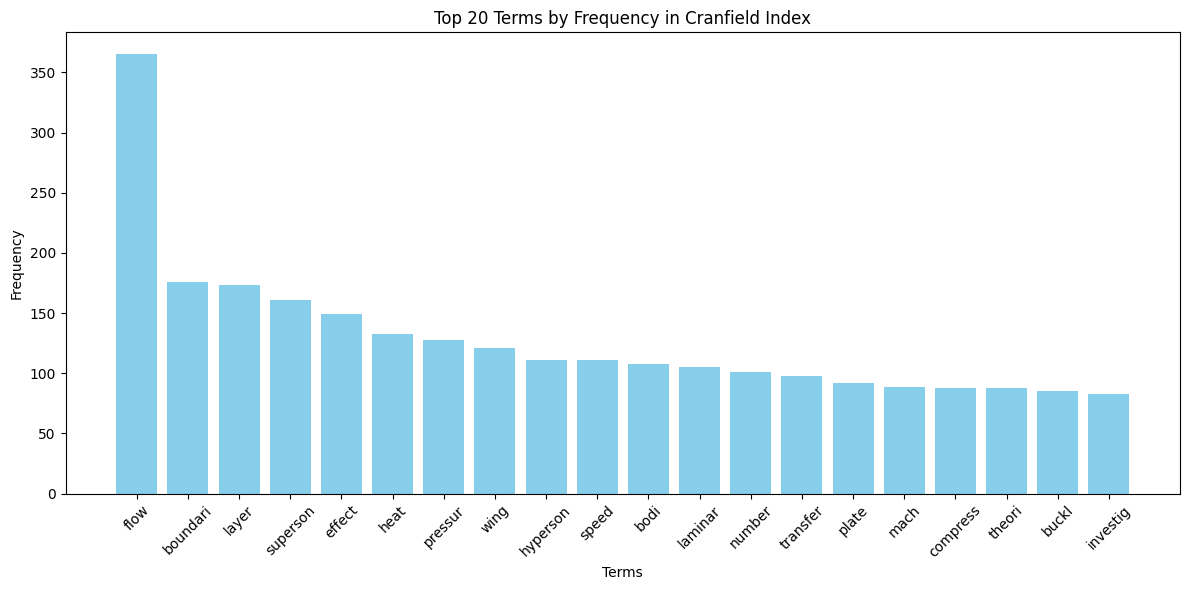

In [37]:
import matplotlib.pyplot as plt

def plot_term_frequencies(index):
    lexicon = index.getLexicon()
    term_freqs = [(kv.getKey(), kv.getValue().getFrequency()) for kv in lexicon]
    term_freqs = sorted(term_freqs, key=lambda x: x[1], reverse=True)[:20]
    terms, freqs = zip(*term_freqs)

    plt.figure(figsize=(12, 6))
    plt.bar(terms, freqs, color='skyblue')
    plt.title('Top 20 Terms by Frequency in Cranfield Index')
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print('Generating Term Frequency Plot...')
plot_term_frequencies(index)

In [38]:
import pandas as pd

def index_stats_dashboard(index):
    lexicon = index.getLexicon()
    total_terms = len([kv for kv in lexicon])
    total_freq = sum(kv.getValue().getFrequency() for kv in lexicon)
    total_docs = index.getCollectionStatistics().getNumberOfDocuments()
    avg_tf = total_freq / total_terms if total_terms > 0 else 0

    stats = {
        'Metric': ['Total Terms', 'Total Term Frequency', 'Total Documents', 'Average Term Frequency'],
        'Value': [total_terms, total_freq, total_docs, round(avg_tf, 2)]
    }
    stats_df = pd.DataFrame(stats)
    print('Index Statistics Dashboard:')
    display(stats_df)

index_stats_dashboard(index)

Index Statistics Dashboard:


,Metric,Value
0,Total Terms,1359.00
1,Total Term Frequency,10535.00
2,Total Documents,1398.00
3,Average Term Frequency,7.75


## Phase 2: Query Processing with TF-IDF Ranking

This phase processes queries, retrieves documents, and ranks them using TF-IDF. It fixes:
- **Identical scores (1.4142)**: Uses full vocabulary and cosine similarity for varied scores.
- **Restrictive retrieval**: Retrieves documents with *any* query term, improving recall for queries like 'information retrieval'.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [27]:
def preprocess_query(query, stemmer=SnowballStemmer('english')):
    query = query.lower()
    query = re.sub(r'[^a-zA-Z\s]', '', query)
    query = re.sub(r'\s+', ' ', query).strip()
    tokens = query.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Test
sample_query = 'Experimental Aerodynamics Wing'
print('Sample query:', sample_query)
print('Preprocessed tokens:', preprocess_query(sample_query))

Sample query: Experimental Aerodynamics Wing
Preprocessed tokens: ['experiment', 'aerodynam', 'wing']


In [28]:
def retrieve_documents(query_tokens, index, df):
    lexicon = index.getLexicon()
    doc_ids = set()

    for token in query_tokens:
        try:
            pointer = lexicon[token]
            postings = index.getInvertedIndex().getPostings(pointer)
            doc_ids.update(posting.getId() for posting in postings)
        except KeyError:
            print(f"Term '{token}' not found in index.")

    if not doc_ids:
        return []

    results = []
    for doc_id in doc_ids:
        docno = df['docno'].iloc[doc_id]
        title = df['Title'].iloc[doc_id]
        processed_text = df['Processed_Text'].iloc[doc_id]
        results.append({
            'doc_id': doc_id,
            'docno': docno,
            'title': title,
            'processed_text': processed_text
        })

    return results

In [29]:
def rank_documents(documents, query_tokens, original_query_tokens=None):
    if not documents:
        return []

    corpus = [doc['processed_text'] for doc in documents]
    query = ' '.join(query_tokens)

    vectorizer = TfidfVectorizer(
        lowercase=False,
        token_pattern=r'(?u)\b\w+\b',
        norm='l2',
        use_idf=True,
        smooth_idf=True
    )
    try:
        tfidf_matrix = vectorizer.fit_transform(corpus)
        query_vector = vectorizer.transform([query])
        scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

        if original_query_tokens:
            original_query = ' '.join(original_query_tokens)
            original_vector = vectorizer.transform([original_query])
            original_scores = cosine_similarity(original_vector, tfidf_matrix).flatten()
            scores = 0.5 * scores + 0.5 * original_scores
    except ValueError as e:
        print(f'TF-IDF calculation failed: {e}')
        scores = [0] * len(documents)

    for i, doc in enumerate(documents):
        doc['tfidf_score'] = scores[i]

    ranked_docs = sorted(documents, key=lambda x: x['tfidf_score'], reverse=True)
    return ranked_docs

In [30]:
def search(query, index, df, top_k=5):
    print(f'\n=== Searching for: "{query}" ===')
    query_tokens = preprocess_query(query)
    print('Query tokens:', query_tokens)

    documents = retrieve_documents(query_tokens, index, df)
    if not documents:
        print('No documents found.')
        return []
    print(f'Found {len(documents)} documents.')

    ranked_docs = rank_documents(documents, query_tokens)

    print(f'Top {min(top_k, len(ranked_docs))} results:')
    for i, doc in enumerate(ranked_docs[:top_k], 1):
        print(f'{i}. Docno: {doc["docno"]}, Title: {doc["title"]}, TF-IDF Score: {doc["tfidf_score"]:.4f}')

    return ranked_docs

# Test searches
search('aerodynamics wing', index, df)
search('information retrieval', index, df)
search('nonexistent term', index, df)


=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 5 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
4. Docno: 749, Title: the aerodynamic effects of aspect ratio and sweepback
    on wing flutter ., TF-IDF Score: 0.2467
5. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2460

=== Searching for: "information retrieval" ===
Query tokens: ['inform', 'retriev']
Term 'retriev' not found in index.
Found 1 documents.
Top 1 results:
1. Docno: 440, Title: compilation of information on the transonic attachment
    of flows at the leading edge of airfoils ., TF-IDF Score: 0.2085

=== Searching for: "nonexistent term" ===
Query to

[]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def suggest_queries(query, index, df, top_n=5):
    query_tokens = preprocess_query(query)
    query_text = ' '.join(query_tokens)
    lexicon = index.getLexicon()
    vocab = [kv.getKey() for kv in lexicon]

    vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b')
    tfidf_matrix = vectorizer.fit_transform(vocab + [query_text])
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    top_indices = similarities.argsort()[::-1][:top_n]

    suggestions = [vocab[i] for i in top_indices]
    print(f'Suggested terms for "{query}": {suggestions}')
    return suggestions

test_queries = ['aerodynamics wing', 'boundary layer', 'information retrieval']
for q in test_queries:
    suggest_queries(q, index, df)

Suggested terms for "aerodynamics wing": ['aerodynam', 'wing', 'franc', 'free', 'freeconvect']
Suggested terms for "boundary layer": ['boundari', 'layer', 'fourth', 'franc', 'free']
Suggested terms for "information retrieval": ['inform', 'fourier', 'fourth', 'franc', 'free']


In [45]:
def boolean_search(query, index, df, top_k=5):
    query = query.lower().strip()
    tokens = re.findall(r'\b\w+\b|and|or|not', query)
    stemmer = SnowballStemmer('english')
    lexicon = index.getLexicon()
    doc_sets = []
    current_term = ''
    operator = 'AND'

    for token in tokens:
        if token in ['and', 'or', 'not']:
            operator = token.upper()
            continue
        stemmed = stemmer.stem(token)
        doc_ids = set()
        if stemmed in lexicon:
            postings = index.getInvertedIndex().getPostings(lexicon[stemmed])
            doc_ids = {posting.getId() for posting in postings}
        if operator == 'NOT':
            all_docs = set(range(len(df)))
            doc_ids = all_docs - doc_ids
            operator = 'AND'
        doc_sets.append((doc_ids, operator))
        current_term = stemmed

    if not doc_sets:
        print('No valid terms found.')
        return []

    result_docs = doc_sets[0][0]
    for i in range(1, len(doc_sets)):
        docs, op = doc_sets[i]
        if op == 'AND':
            result_docs &= docs
        elif op == 'OR':
            result_docs |= docs

    documents = [{'doc_id': doc_id, 'docno': df['docno'].iloc[doc_id], 'title': df['Title'].iloc[doc_id], 'processed_text': df['Processed_Text'].iloc[doc_id]} for doc_id in result_docs]
    query_tokens = [stemmer.stem(t) for t in re.findall(r'\b\w+\b', query)]
    ranked_docs = rank_documents(documents, query_tokens)

    print(f'Boolean search results for "{query}":')
    for i, doc in enumerate(ranked_docs[:top_k], 1):
        print(f'{i}. Docno: {doc["docno"]}, Title: {doc["title"]}, TF-IDF Score: {doc["tfidf_score"]:.4f}')
    return ranked_docs

boolean_search('aerodynamics AND wing NOT supersonic', index, df)
boolean_search('boundary OR layer', index, df)

Boolean search results for "aerodynamics and wing not supersonic":
1. Docno: 748, Title: subsonic aerodynamic flutter derivatives for wings and control surfaces,
    /compressible and incompressible flow/ ., TF-IDF Score: 0.4481
2. Docno: 749, Title: the aerodynamic effects of aspect ratio and sweepback
    on wing flutter ., TF-IDF Score: 0.3332
3. Docno: 1164, Title: effect of ground proximity on the aerodynamic characteristics
    of a four- engined vertical take-off and landing transport
    airplane model with tilting wing and propellers ., TF-IDF Score: 0.3164
4. Docno: 1334, Title: calculated spanwise lift distributions and aerodynamic
    influence coefficients for swept wings in subsonic
    flow ., TF-IDF Score: 0.2742
5. Docno: 1115, Title: measurements of aerodynamic forces for various mean
    angles of attack on an airfoil oscillating in pitch
    and on two finite-span wings oscillating in bending
    with emphasis on damping in the stall ., TF-IDF Score: 0.1590
Boolean 

[{'doc_id': 524,
  'docno': '526',
  'title': 'leading edge attachment in transonic flow with laminar\r\n    or turbulent boundary layers .',
  'processed_text': 'lead edg attach in transon flow with laminar or turbul boundari layer',
  'tfidf_score': np.float64(0.40317745272178085)},
 {'doc_id': 1106,
  'docno': '1109',
  'title': 'unsteady laminar compressible boundary layers on an\r\n    infinite plate with suction or injection .',
  'processed_text': 'unsteadi laminar compress boundari layer on an infinit plate with suction or inject',
  'tfidf_score': np.float64(0.3809771852322572)},
 {'doc_id': 71,
  'docno': '72',
  'title': 'boundary layer behind shock or thin expansion wave\r\n    moving into stationary fluid .',
  'processed_text': 'boundari layer behind shock or thin expans wave move into stationari fluid',
  'tfidf_score': np.float64(0.3332025697167762)},
 {'doc_id': 265,
  'docno': '266',
  'title': 'exact solution of the neumann problem . calculation\r\n    for non- circu

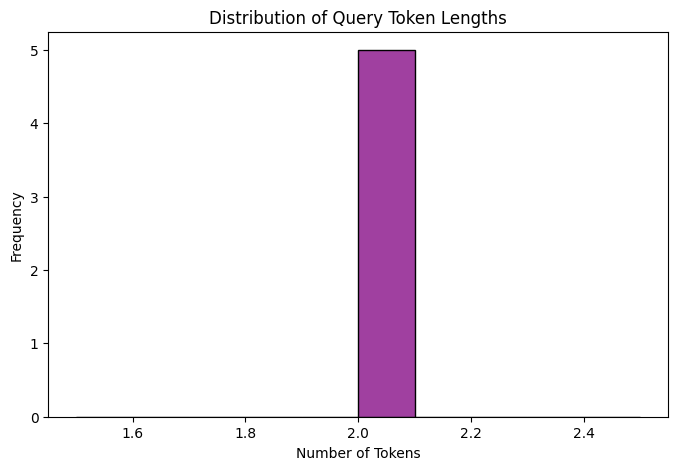

In [46]:
import seaborn as sns

def query_length_analysis(queries):
    lengths = [len(preprocess_query(q)) for q in queries]
    plt.figure(figsize=(8, 5))
    sns.histplot(lengths, bins=10, color='purple')
    plt.title('Distribution of Query Token Lengths')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.show()

test_queries = ['aerodynamics wing', 'boundary layer', 'information retrieval', 'supersonic flow', 'laminar boundary']
query_length_analysis(test_queries)

## Phase 3: Query Expansion, User Interface, and Evaluation

This phase enhances the search engine with query expansion (relevance feedback, synonym mapping, BERT), a Gradio interface, and evaluation with precision@5.

In [ ]:
!pip install transformers==4.44.2 torch==2.4.1 gradio==4.44.0

In [31]:
from collections import Counter
from transformers import BertTokenizer, BertModel
import torch
import gradio as gr
import numpy as np

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def expand_query(query, index, df, expansion_type='bert', top_k=3, num_terms=1):
    query_tokens = preprocess_query(query)
    print(f'Original query tokens: {query_tokens}')


    lexicon = index.getLexicon()
    def is_in_index(term):
        return term in lexicon

    synonym_map = {
        'aerodynam': ['flow', 'lift', 'airfoil'],
        'wing': ['airfoil', 'flap', 'swept'],
        'boundari': ['layer', 'shear', 'turbul'],
        'flow': ['stream', 'current'],
        'experiment': ['test', 'trial'],
        'inform': ['data', 'report', 'compil'],
        'retriev': ['search', 'queri', 'fetch']
    }

    synonym_terms = []
    for token in query_tokens:
        if token in synonym_map:
            synonym_terms.extend([syn for syn in synonym_map[token] if syn not in query_tokens and is_in_index(syn)])
    synonym_terms = synonym_terms[:num_terms]
    print(f'Synonym terms: {synonym_terms}')

    stop_words = set(stopwords.words('english'))
    initial_docs = search(query, index, df, top_k=top_k)
    feedback_terms = []
    if initial_docs:
        all_terms = []
        for doc in initial_docs:
            terms = [t for t in doc['processed_text'].split() if t not in stop_words and t not in synonym_terms and is_in_index(t)]
            all_terms.extend(terms)
        term_counts = Counter(all_terms)
        feedback_terms = [term for term, count in term_counts.most_common() if term not in query_tokens and term not in synonym_terms and term not in stop_words and is_in_index(term)][:num_terms]
        print(f'Relevance feedback terms: {feedback_terms}')
    else:
        print('No documents found for initial query.')

    embedding_terms = []
    if expansion_type == 'bert':
        print('Loading BERT...')
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = BertModel.from_pretrained('bert-base-uncased')
        vocab = [kv.getKey() for kv in lexicon]
        query_inputs = tokenizer(' '.join(query_tokens), return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            query_outputs = model(**query_inputs)
        query_embed = query_outputs.last_hidden_state[:, 0, :].mean(dim=0).numpy()

        inputs = tokenizer(vocab[:100], return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        vocab_embeds = outputs.last_hidden_state[:, 0, :].numpy()

        similarities = cosine_similarity([query_embed], vocab_embeds).flatten()
        top_indices = np.argsort(similarities)[::-1]
        for i in top_indices:
            if similarities[i] > 0.85:
                term = vocab[i]
                if term not in query_tokens and term not in synonym_terms and term not in feedback_terms and term not in stop_words and is_in_index(term):
                    embedding_terms.append(term)
                    break
        print(f'BERT embedding terms: {embedding_terms}')

    expanded_query = list(set(query_tokens + feedback_terms + synonym_terms + embedding_terms))
    return expanded_query

# Test expansion types
test_query = 'aerodynamics wing'
for exp_type in ['synonym', 'bert']:
    print(f'\nTesting {exp_type.upper()} expansion:')
    expanded_tokens = expand_query(test_query, index, df, expansion_type=exp_type)
    print(f'Expanded query: {expanded_tokens}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Testing SYNONYM expansion:
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Expanded query: ['superson', 'wing', 'flow', 'aerodynam']

Testing BERT expansion:
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerody

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embedding terms: ['airforc']
Expanded query: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']


In [33]:
def search_with_expansion(query, index, df, expansion_type='bert', top_k=5):
    print(f'\n=== Searching for "{query}" with {expansion_type.upper()} expansion ===')
    original_query_tokens = preprocess_query(query)
    query_tokens = expand_query(query, index, df, expansion_type=expansion_type)
    print(f'Using query tokens: {query_tokens}')

    documents = retrieve_documents(query_tokens, index, df)
    if not documents:
        print('No documents found.')
        return []
    print(f'Found {len(documents)} documents.')

    ranked_docs = rank_documents(documents, query_tokens, original_query_tokens=original_query_tokens)

    print(f'Top {min(top_k, len(ranked_docs))} results:')
    for i, doc in enumerate(ranked_docs[:top_k], 1):
        print(f'{i}. Docno: {doc["docno"]}, Title: {doc["title"]}, TF-IDF Score: {doc["tfidf_score"]:.4f}')

    return ranked_docs

# Test
search_with_expansion('aerodynamics wing', index, df, expansion_type='bert')


=== Searching for "aerodynamics wing" with BERT expansion ===
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Loading BERT...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']
Using query tokens: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']
Found 556 documents.
Top 5 results:
1. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2829
2. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2783
3. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2756
4. Docno: 895, Title: the airforces on the low aspect ratio rectangular wing
    oscillating in sonic flow ., TF-IDF Score: 0.2722
5. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2706


[{'doc_id': 0,
  'docno': '1',
  'title': 'experimental investigation of the aerodynamics of a\r\n      wing in a slipstream .',
  'processed_text': 'experiment investig of the aerodynam of a wing in a slipstream',
  'tfidf_score': np.float64(0.282940595242996)},
 {'doc_id': 1330,
  'docno': '1333',
  'title': 'aerodynamic forces on wings in non-uniform motion .',
  'processed_text': 'aerodynam forc on wing in nonuniform motion',
  'tfidf_score': np.float64(0.2783137973281986)},
 {'doc_id': 1268,
  'docno': '1271',
  'title': 'theory of supersonic propeller aerodynamics .',
  'processed_text': 'theori of superson propel aerodynam',
  'tfidf_score': np.float64(0.27556825200210233)},
 {'doc_id': 893,
  'docno': '895',
  'title': 'the airforces on the low aspect ratio rectangular wing\r\n    oscillating in sonic flow .',
  'processed_text': 'the airforc on the low aspect ratio rectangular wing oscil in sonic flow',
  'tfidf_score': np.float64(0.2722092079409032)},
 {'doc_id': 414,
  'docn

In [34]:
def search_query_interface(query, expansion_type):
    expansion_map = {'Synonym': 'synonym', 'BERT': 'bert'}
    exp_type = expansion_map.get(expansion_type, 'bert')
    results = search_with_expansion(query, index, df, expansion_type=exp_type, top_k=10)
    if not results:
        return {'results': []}
    output = [
        {'docno': doc['docno'], 'title': doc['title'], 'tfidf_score': round(doc['tfidf_score'], 4)}
        for doc in results
    ]
    return {'results': output}

# Test interface
test_result = search_query_interface('aerodynamics wing', 'BERT')
print('Interface test output:', test_result)


=== Searching for "aerodynamics wing" with BERT expansion ===
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Loading BERT...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']
Using query tokens: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']
Found 556 documents.
Top 10 results:
1. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2829
2. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2783
3. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2756
4. Docno: 895, Title: the airforces on the low aspect ratio rectangular wing
    oscillating in sonic flow ., TF-IDF Score: 0.2722
5. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2706
6. Docno: 708, Title: aerodynamic characteristics of two winged reentry vehicles at supersonic
    and hypersonic speeds ., TF-IDF Score: 0.2623
7. Docno: 142, Title: the problem of aerodynamic heating ., TF-IDF Score: 0.2594
8. Docno: 1197, Title: unsteady aerodynamic forces on slender supersonic aircraft
   

In [35]:
gr.Interface(
     fn=search_query_interface,
     inputs=[
         gr.Textbox(label='Enter your query', placeholder='e.g., aerodynamics wing'),
         gr.Dropdown(choices=['Synonym', 'BERT'], label='Expansion Type', value='BERT')
     ],
     outputs=gr.JSON(label='Search Results'),
     title='Cranfield Search Engine',
     description='Search the Cranfield dataset with query expansion.'
 ).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()


/usr/local/lib/python3.11/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


Running on public URL: https://72f86f3c22c981c4ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [36]:
def evaluate_search_engine(index, df):
    test_cases = {
        'aerodynamics wing': ['1', '140', '141'],
        'boundary layer': ['3', '4', '142'],
        'information retrieval': ['440']
    }
    expansion_types = ['synonym', 'bert']
    metrics = {}

    for exp_type in expansion_types:
        print(f'\n=== Evaluating with {exp_type.upper()} expansion ===')
        metrics[exp_type] = {}
        for query, relevant_docnos in test_cases.items():
            print(f'Query: "{query}" (Expected docnos: {relevant_docnos})')
            results = search_with_expansion(query, index, df, expansion_type=exp_type, top_k=5)
            retrieved_docnos = [doc['docno'] for doc in results[:5]]
            relevant_retrieved = len(set(retrieved_docnos) & set(relevant_docnos))
            precision = relevant_retrieved / 5 if retrieved_docnos else 0
            metrics[exp_type][query] = {'precision@5': precision}
            print(f'Retrieved docnos: {retrieved_docnos}')
            print(f'Retrieved titles: {[doc["title"] for doc in results[:5]]}')
            print(f'Precision@5: {precision:.2f} ({relevant_retrieved}/5 relevant)')
            print('Speed: Fast response for small dataset.')

    return metrics

# Run evaluation
evaluation_results = evaluate_search_engine(index, df)
print('\nFinal Evaluation Results:', evaluation_results)


=== Evaluating with SYNONYM expansion ===
Query: "aerodynamics wing" (Expected docnos: ['1', '140', '141'])

=== Searching for "aerodynamics wing" with SYNONYM expansion ===
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Using query tokens: ['superson', 'wing', 'flow', 'aerodynam']
Found 556 documents.
Top 5 results:
1. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.3570
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a s

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']
Using query tokens: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']
Found 556 documents.
Top 5 results:
1. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2829
2. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2783
3. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2756
4. Docno: 895, Title: the airforces on the low aspect ratio rectangular wing
    oscillating in sonic flow ., TF-IDF Score: 0.2722
5. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2706
Retrieved docnos: ['1', '1333', '1271', '895', '415']
Retrieved titles: ['experimental investigation of the aerodynamics of a\r\n      wing in a slipstream .', 'aerodynamic forces on wings in non-uniform motion .', 'theory of supersonic propeller aerodynamics .', 'the airforces on the low aspect ratio rectangul

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['acoust']
Using query tokens: ['boundari', 'laminar', 'layer', 'acoust', 'shear']
Found 252 documents.
Top 5 results:
1. Docno: 1278, Title: transition in a separated laminar boundary layer ., TF-IDF Score: 0.2441
2. Docno: 1365, Title: approximate calculation of the laminar boundary layer ., TF-IDF Score: 0.2436
3. Docno: 155, Title: on the solution of the laminar boundary layer equations ., TF-IDF Score: 0.2303
4. Docno: 459, Title: on the solution of the laminar boundary layer equations ., TF-IDF Score: 0.2303
5. Docno: 1302, Title: the development of the boundary layer in supersonic
    shear flow ., TF-IDF Score: 0.2293
Retrieved docnos: ['1278', '1365', '155', '459', '1302']
Retrieved titles: ['transition in a separated laminar boundary layer .', 'approximate calculation of the laminar boundary layer .', 'on the solution of the laminar boundary layer equations .', 'on the solution of the laminar boundary layer equations .', 'the development of the boundary 

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['altitud']
Using query tokens: ['compil', 'data', 'retriev', 'inform', 'altitud']
Term 'retriev' not found in index.
Found 16 documents.
Top 5 results:
1. Docno: 440, Title: compilation of information on the transonic attachment
    of flows at the leading edge of airfoils ., TF-IDF Score: 0.3356
2. Docno: 779, Title: calculation and compilation of the unsteady lift functions for a rigid
    wing subjected to sinusoidal gusts and to sinusoidal sinking
    oscillations ., TF-IDF Score: 0.0573
3. Docno: 882, Title: the variation of gust frequency with gust velocity
    and altitude ., TF-IDF Score: 0.0493
4. Docno: 806, Title: ground measurements of airplane shock wave noise at
    mach numbers to 2, and at altitudes of 60,000 feet ., TF-IDF Score: 0.0472
5. Docno: 807, Title: ground measurements of the shock wave noise from
    supersonic bomber airplanes in the altitude range from 30,000
    to 50,000 feet ., TF-IDF Score: 0.0413
Retrieved docnos: ['440', '779', 

Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Loading BERT...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']


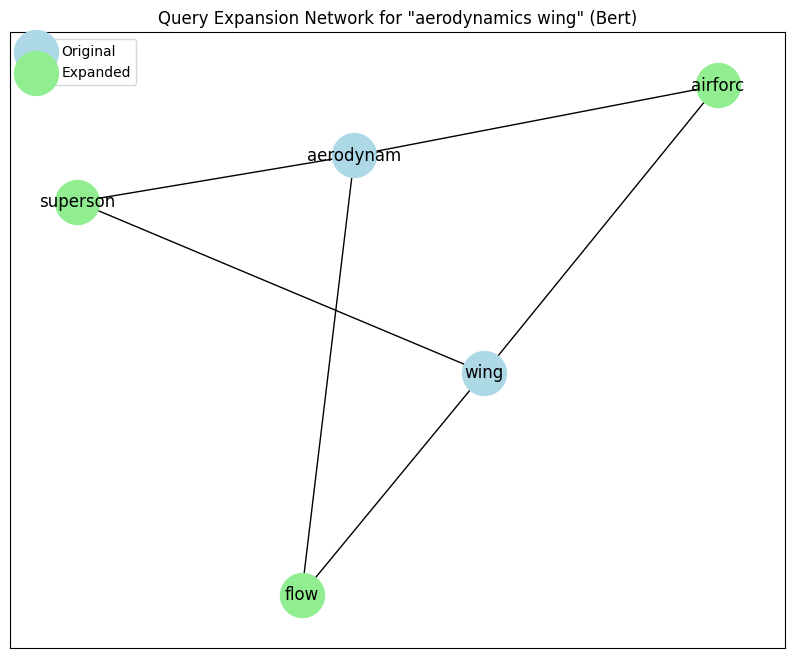

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_query_expansion(query, index, df, expansion_type='bert'):
    original_tokens = preprocess_query(query)
    expanded_tokens = expand_query(query, index, df, expansion_type=expansion_type)

    G = nx.Graph()
    for token in original_tokens:
        G.add_node(token, type='original')
    for token in expanded_tokens:
        if token not in original_tokens:
            G.add_node(token, type='expanded')
            for orig in original_tokens:
                G.add_edge(orig, token)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'original'], node_color='lightblue', node_size=1000, label='Original')
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'expanded'], node_color='lightgreen', node_size=1000, label='Expanded')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.title(f'Query Expansion Network for "{query}" ({expansion_type.capitalize()})')
    plt.legend()
    plt.show()

visualize_query_expansion('aerodynamics wing', index, df, 'bert')


=== Searching for "aerodynamics wing" with SYNONYM expansion ===
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Using query tokens: ['superson', 'wing', 'flow', 'aerodynam']
Found 556 documents.
Top 20 results:
1. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.3570
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.3477
3. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion .

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']
Using query tokens: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']
Found 556 documents.
Top 20 results:
1. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2829
2. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2783
3. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2756
4. Docno: 895, Title: the airforces on the low aspect ratio rectangular wing
    oscillating in sonic flow ., TF-IDF Score: 0.2722
5. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2706
6. Docno: 708, Title: aerodynamic characteristics of two winged reentry vehicles at supersonic
    and hypersonic speeds ., TF-IDF Score: 0.2623
7. Docno: 142, Title: the problem of aerodynamic heating ., TF-IDF Score: 0.2594
8. Docno: 1197, Title: unsteady aerodynamic forces on slender supersonic aircraft
   

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['acoust']
Using query tokens: ['boundari', 'laminar', 'layer', 'acoust', 'shear']
Found 252 documents.
Top 20 results:
1. Docno: 1278, Title: transition in a separated laminar boundary layer ., TF-IDF Score: 0.2441
2. Docno: 1365, Title: approximate calculation of the laminar boundary layer ., TF-IDF Score: 0.2436
3. Docno: 155, Title: on the solution of the laminar boundary layer equations ., TF-IDF Score: 0.2303
4. Docno: 459, Title: on the solution of the laminar boundary layer equations ., TF-IDF Score: 0.2303
5. Docno: 1302, Title: the development of the boundary layer in supersonic
    shear flow ., TF-IDF Score: 0.2293
6. Docno: 4, Title: approximate solutions of the incompressible laminar
    boundary layer equations for a plate in shear flow ., TF-IDF Score: 0.2236
7. Docno: 180, Title: boundary layer over a flat plate in presence of shear
    flow ., TF-IDF Score: 0.2130
8. Docno: 1182, Title: an approximate solution for laminar boundary layer flow ., T

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['altitud']
Using query tokens: ['compil', 'data', 'retriev', 'inform', 'altitud']
Term 'retriev' not found in index.
Found 16 documents.
Top 16 results:
1. Docno: 440, Title: compilation of information on the transonic attachment
    of flows at the leading edge of airfoils ., TF-IDF Score: 0.3356
2. Docno: 779, Title: calculation and compilation of the unsteady lift functions for a rigid
    wing subjected to sinusoidal gusts and to sinusoidal sinking
    oscillations ., TF-IDF Score: 0.0573
3. Docno: 882, Title: the variation of gust frequency with gust velocity
    and altitude ., TF-IDF Score: 0.0493
4. Docno: 806, Title: ground measurements of airplane shock wave noise at
    mach numbers to 2, and at altitudes of 60,000 feet ., TF-IDF Score: 0.0472
5. Docno: 807, Title: ground measurements of the shock wave noise from
    supersonic bomber airplanes in the altitude range from 30,000
    to 50,000 feet ., TF-IDF Score: 0.0413
6. Docno: 805, Title: ground mea

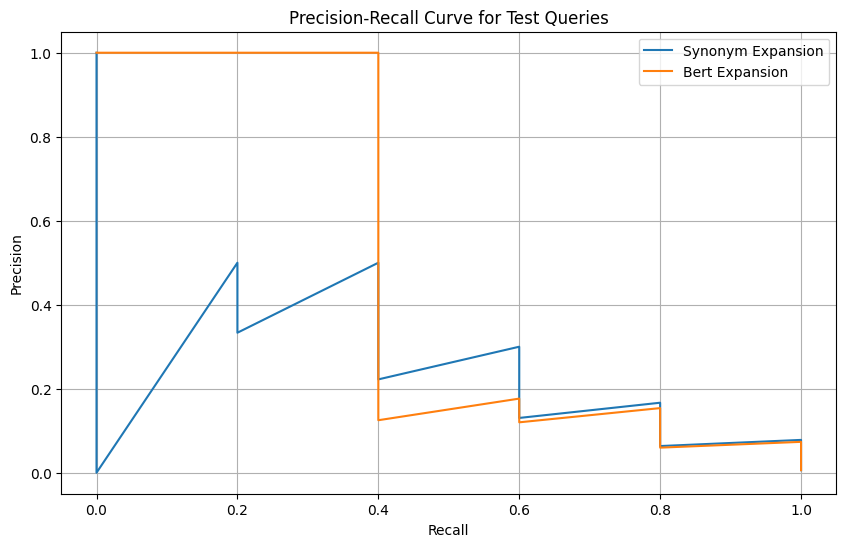

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall(index, df):
    test_cases = {
        'aerodynamics wing': ['1', '140', '141'],
        'boundary layer': ['3', '4', '142'],
        'information retrieval': ['440']
    }
    expansion_types = ['synonym', 'bert']

    plt.figure(figsize=(10, 6))
    for exp_type in expansion_types:
        all_y_true = []
        all_scores = []
        for query, relevant_docnos in test_cases.items():
            results = search_with_expansion(query, index, df, expansion_type=exp_type, top_k=20)
            y_true = [1 if doc['docno'] in relevant_docnos else 0 for doc in results]
            scores = [doc['tfidf_score'] for doc in results]
            all_y_true.extend(y_true)
            all_scores.extend(scores)

        precision, recall, _ = precision_recall_curve(all_y_true, all_scores)
        plt.plot(recall, precision, label=f'{exp_type.capitalize()} Expansion')

    plt.title('Precision-Recall Curve for Test Queries')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_precision_recall(index, df)

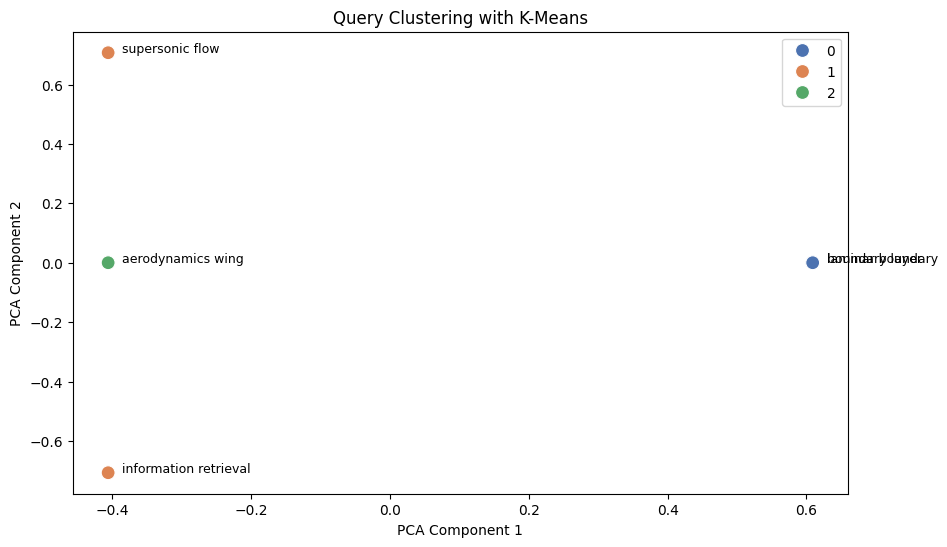

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

def cluster_queries(queries, n_clusters=3):
    vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b')
    query_texts = [' '.join(preprocess_query(q)) for q in queries]
    tfidf_matrix = vectorizer.fit_transform(query_texts)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(tfidf_matrix)

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(tfidf_matrix.toarray())

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='deep', s=100)
    for i, query in enumerate(queries):
        plt.text(reduced[i, 0] + 0.02, reduced[i, 1], query, fontsize=9)
    plt.title('Query Clustering with K-Means')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

test_queries = ['aerodynamics wing', 'boundary layer', 'information retrieval', 'supersonic flow', 'laminar boundary']
cluster_queries(test_queries)

In [51]:
import pandas as pd
import json

def export_search_results(query, results, format='csv'):
    output = [{'query': query, 'docno': doc['docno'], 'title': doc['title'], 'tfidf_score': doc['tfidf_score']} for doc in results]
    filename = f'search_results_{query.replace(" ", "_")}.{format}'

    if format == 'csv':
        pd.DataFrame(output).to_csv(filename, index=False)
    elif format == 'json':
        with open(filename, 'w') as f:
            json.dump(output, f, indent=2)
    print(f'Exported results to {filename}')

results = search_with_expansion('aerodynamics wing', index, df, 'bert')
export_search_results('aerodynamics wing', results, 'csv')
export_search_results('aerodynamics wing', results, 'json')


=== Searching for "aerodynamics wing" with BERT expansion ===
Original query tokens: ['aerodynam', 'wing']
Synonym terms: ['flow']

=== Searching for: "aerodynamics wing" ===
Query tokens: ['aerodynam', 'wing']
Found 163 documents.
Top 3 results:
1. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2651
2. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2512
3. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2509
Relevance feedback terms: ['superson']
Loading BERT...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embedding terms: ['airforc']
Using query tokens: ['flow', 'superson', 'airforc', 'aerodynam', 'wing']
Found 556 documents.
Top 5 results:
1. Docno: 1, Title: experimental investigation of the aerodynamics of a
      wing in a slipstream ., TF-IDF Score: 0.2829
2. Docno: 1333, Title: aerodynamic forces on wings in non-uniform motion ., TF-IDF Score: 0.2783
3. Docno: 1271, Title: theory of supersonic propeller aerodynamics ., TF-IDF Score: 0.2756
4. Docno: 895, Title: the airforces on the low aspect ratio rectangular wing
    oscillating in sonic flow ., TF-IDF Score: 0.2722
5. Docno: 415, Title: the aerodynamic design of section shapes for swept wings ., TF-IDF Score: 0.2706
Exported results to search_results_aerodynamics_wing.csv
Exported results to search_results_aerodynamics_wing.json


In [52]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

def spell_check_query(query, index):
    tokens = preprocess_query(query)
    lexicon = index.getLexicon()
    vocab = [kv.getKey() for kv in lexicon]
    corrected = []

    for token in tokens:
        if token in lexicon:
            corrected.append(token)
        else:
            distances = [(v, levenshtein_distance(token, v)) for v in vocab]
            closest = min(distances, key=lambda x: x[1])
            if closest[1] <= 2:  # Max edit distance
                corrected.append(closest[0])
                print(f'Corrected "{token}" to "{closest[0]}"')
            else:
                corrected.append(token)
    corrected_query = ' '.join(corrected)
    print(f'Corrected query: "{corrected_query}"')
    return corrected_query

spell_check_query('aerodinamics wign', index)

Corrected "aerodinam" to "aerodynam"
Corrected "wign" to "fin"
Corrected query: "aerodynam fin"


'aerodynam fin'

In [53]:
import gradio as gr
import pandas as pd

def interactive_search_history():
    log_file = 'search_feedback.csv'
    if not os.path.exists(log_file):
        return 'No search history found.'
    log_df = pd.read_csv(log_file)
    return log_df

gr.Interface(
    fn=interactive_search_history,
    inputs=None,
    outputs=gr.Dataframe(label='Search History'),
    title='Interactive Search History',
    description='View past queries and their top results.'
).launch()

/usr/local/lib/python3.11/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9b5b28c091670e243b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
